In [6]:
! pip install "tensorflow>=2.0.0"


In [1]:

import warnings
warnings.filterwarnings("ignore")

import os

import glob
import matplotlib.pyplot as plt
import tensorflow as tf
# Keras API

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.utils.vis_utils import plot_model



In [2]:
# My data is in google drive.
train_dir ="F:/machinelearning/face-mask-dcb/final_DCBmask_train_test_val/train"
val_dir="F:/machinelearning/face-mask-dcb/final_DCBmask_train_test_val/val"


In [3]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count += len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [4]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))

print(num_classes,"Classes")
print(train_samples,"Train images")


13 Classes
43534 Train images


In [5]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [6]:
# set height and width and color of input image.
img_width,img_height =128,128
input_shape=(img_width,img_height,3)
batch_size =32
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)


Found 43534 images belonging to 13 classes.


In [7]:
# The name of the 11 classes.
train_generator.class_indices

{'Achuthsankar': 0,
 'Alwin': 1,
 'Arya': 2,
 'Aryason': 3,
 'Ashwini': 4,
 'Biji': 5,
 'Chithra': 6,
 'Rani': 7,
 'Rashmi': 8,
 'Shanitha': 9,
 'Sheeba': 10,
 'Silpa': 11,
 'Sunitha': 12}

In [8]:
#CNN building.
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 39, 39, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [16]:
# validation data.
validation_generator = val_datagen.flow_from_directory(val_dir, target_size=(img_height, img_width),batch_size=batch_size)

Found 5437 images belonging to 13 classes.


In [18]:
# Model building to get trained with parameters.
#opt=keras.optimizers.adam(lr=0.001)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          epochs=25,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          verbose=1)

Epoch 1/25
1360/1360 [==============================] - 1667s 1s/step - loss: 0.3578 - accuracy: 0.8824 - val_loss: 0.0700 - val_accuracy: 0.9781
Epoch 2/25
1360/1360 [==============================] - 756s 556ms/step - loss: 0.0556 - accuracy: 0.9832 - val_loss: 0.0200 - val_accuracy: 0.9941
Epoch 3/25
1360/1360 [==============================] - 724s 532ms/step - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.0353 - val_accuracy: 0.9875
Epoch 4/25
1360/1360 [==============================] - 727s 534ms/step - loss: 0.0350 - accuracy: 0.9896 - val_loss: 0.0230 - val_accuracy: 0.9939
Epoch 5/25
1360/1360 [==============================] - 738s 542ms/step - loss: 0.0291 - accuracy: 0.9914 - val_loss: 0.0081 - val_accuracy: 0.9967
Epoch 6/25
1360/1360 [==============================] - 729s 536ms/step - loss: 0.0238 - accuracy: 0.9933 - val_loss: 0.0257 - val_accuracy: 0.9936
Epoch 7/25
1360/1360 [==============================] - 734s 540ms/step - loss: 0.0251 - accuracy: 0.9932 - val_lo

In [19]:
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

<Figure size 432x288 with 0 Axes>

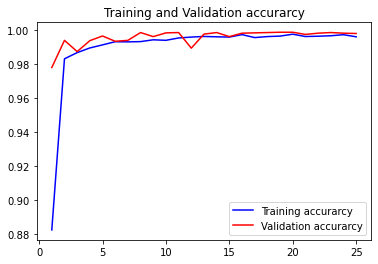

<Figure size 432x288 with 0 Axes>

In [20]:
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

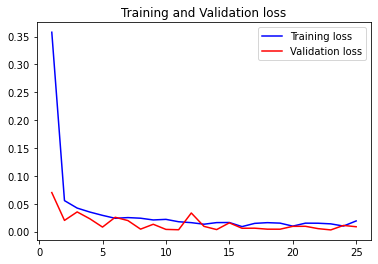

In [21]:
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


In [22]:
# Save entire model with optimizer, architecture, weights and training configuration.
from tensorflow.keras.models import load_model
model.save('dcbfacemaskfinalconvnet.h5', include_optimizer=True)

In [23]:

# Save model weights.
from tensorflow.keras.models import load_model
model.save_weights('dcbfacemaskfinalconvnet_weights.h5')


In [24]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes

{'Achuthsankar': 0,
 'Alwin': 1,
 'Arya': 2,
 'Aryason': 3,
 'Ashwini': 4,
 'Biji': 5,
 'Chithra': 6,
 'Rani': 7,
 'Rashmi': 8,
 'Shanitha': 9,
 'Sheeba': 10,
 'Silpa': 11,
 'Sunitha': 12}

In [25]:
# Loading model and predict.
from tensorflow.keras.models import load_model
model=load_model('dcbfacemaskfinalconvnet.h5')


# **Testing the Model**

In [39]:
import os
import random

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools

from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix,classification_report

%matplotlib inline

In [26]:
test_dir="F:/machinelearning/face-mask-dcb/final_DCBmask_train_test_val/test"
img_width,img_height =128,128
input_shape=(img_width,img_height,3)
batch_size =32

test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=False,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
#classes = test_generator.class_indices 
classes=['Class0', 'Class1', 'Class2', 'Class3', 'Class4', 'Class5', 'Class6', 'Class7', 'Class8', 'Class9', 'Class10', 'Class11', 'class12']

Found 5453 images belonging to 13 classes.


In [27]:
score,accuracy =model.evaluate_generator(test_generator,verbose=1)
print("Test loss is {}".format(score))
print("Test accuracy is {}".format(accuracy))

171/171 [==============================] - 181s 1s/step - loss: 0.0042 - accuracy: 0.9993
Test loss is 0.004155986942350864
Test accuracy is 0.9992664456367493


In [28]:
import numpy 
#test_steps_per_epoch = numpy.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict_generator(test_generator)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

In [29]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  

In [31]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

              precision    recall  f1-score   support

Achuthsankar       1.00      1.00      1.00       563
       Alwin       1.00      1.00      1.00       425
        Arya       1.00      1.00      1.00       697
     Aryason       1.00      1.00      1.00       149
     Ashwini       1.00      1.00      1.00       455
        Biji       1.00      1.00      1.00       692
     Chithra       1.00      1.00      1.00       470
        Rani       1.00      1.00      1.00       465
      Rashmi       1.00      1.00      1.00       207
    Shanitha       1.00      1.00      1.00       162
      Sheeba       1.00      1.00      1.00       706
       Silpa       0.99      1.00      1.00       237
     Sunitha       1.00      1.00      1.00       225

    accuracy                           1.00      5453
   macro avg       1.00      1.00      1.00      5453
weighted avg       1.00      1.00      1.00      5453



In [32]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
report = metrics.classification_report(true_classes, predicted_classes, target_names=classes)
print(report) 

              precision    recall  f1-score   support

      Class0       1.00      1.00      1.00       563
      Class1       1.00      1.00      1.00       425
      Class2       1.00      1.00      1.00       697
      Class3       1.00      1.00      1.00       149
      Class4       1.00      1.00      1.00       455
      Class5       1.00      1.00      1.00       692
      Class6       1.00      1.00      1.00       470
      Class7       1.00      1.00      1.00       465
      Class8       1.00      1.00      1.00       207
      Class9       1.00      1.00      1.00       162
     Class10       1.00      1.00      1.00       706
     Class11       0.99      1.00      1.00       237
     class12       1.00      1.00      1.00       225

    accuracy                           1.00      5453
   macro avg       1.00      1.00      1.00      5453
weighted avg       1.00      1.00      1.00      5453



In [33]:
print('Confusion Matrix')
print(confusion_matrix(true_classes, predicted_classes))

Confusion Matrix
[[561   0   0   0   0   0   0   0   0   0   0   1   1]
 [  0 425   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 697   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 149   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 455   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 692   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 470   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 465   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 207   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 162   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0 705   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 237   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1 224]]


In [34]:
def plot_confusion_matrix(true_classes, predicted_classes, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

In [35]:
classes = test_generator.class_indices 
classes

{'Achuthsankar': 0,
 'Alwin': 1,
 'Arya': 2,
 'Aryason': 3,
 'Ashwini': 4,
 'Biji': 5,
 'Chithra': 6,
 'Rani': 7,
 'Rashmi': 8,
 'Shanitha': 9,
 'Sheeba': 10,
 'Silpa': 11,
 'Sunitha': 12}

Confusion matrix, without normalization


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

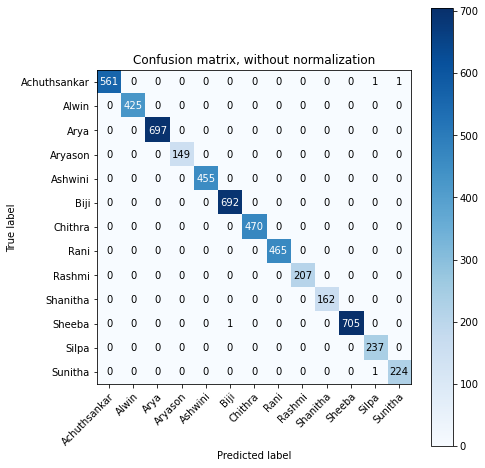

In [36]:
     

# Plotting non-normalized confusion matrix
plot_confusion_matrix(true_classes, predicted_classes, classes, title='Confusion matrix, without normalization')

In [62]:
def prepare(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

Classes = ["Achuthsankar","Alwin", "Arya", "Aryason","Aswini", "Biji", "Chithra", "Rani", "Rashmi", "Shanitha", "Sheeba","Silpa","Sunitha" ]


path = 'F:/machinelearning/face-mask-dcb/mask-transferlearning/ImageCrop/test1/'
filenames = os.listdir(path)

In [70]:
print(filenames)

['Achuthsankar.1.jpg', 'Achuthsankar.12.jpg', 'Achuthsankar.1220.jpg', 'Achuthsankar.1227.jpg', 'Achuthsankar.1256.jpg', 'Achuthsankar.196.jpg', 'Achuthsankar.330.jpg', 'Achuthsankar.354.jpg', 'Achuthsankar.355.jpg', 'Achuthsankar.370.jpg', 'Achuthsankar.534.jpg', 'Achuthsankar.546.jpg', 'Achuthsankar.787.jpg', 'Achuthsankar.931.jpg', 'Alwin.3.jpg', 'Alwin.367.jpg', 'Alwin.380.jpg', 'Alwin.393.jpg', 'Alwin.417.jpg', 'Alwin.489.jpg', 'Alwin.56.jpg', 'Alwin.68.jpg', 'Arya.1.jpg', 'Arya.1028.jpg', 'Arya.1196.jpg', 'Arya.1205.jpg', 'Arya.223.jpg', 'Arya.235.jpg', 'Arya.343.jpg', 'Arya.42.jpg', 'Arya.955.jpg', 'Arya.956.jpg', 'Aswini.1.jpg', 'Aswini.175.jpg', 'Aswini.486.jpg', 'Aswini.53.jpg', 'Aswini.69.jpg', 'Aswini.714.jpg', 'Biji.1.jpg', 'Biji.1160.jpg', 'Biji.1184.jpg', 'Biji.120.jpg', 'Biji.1202.jpg', 'Biji.1527.jpg', 'Biji.1552.jpg', 'Biji.1896.jpg', 'Biji.563.jpg', 'Biji.564.jpg', 'Biji.624.jpg', 'Biji.66.jpg', 'Biji.80.jpg', 'Rani.200.jpg', 'Rani.423.jpg', 'Rani.44.jpg', 'Rani.513.

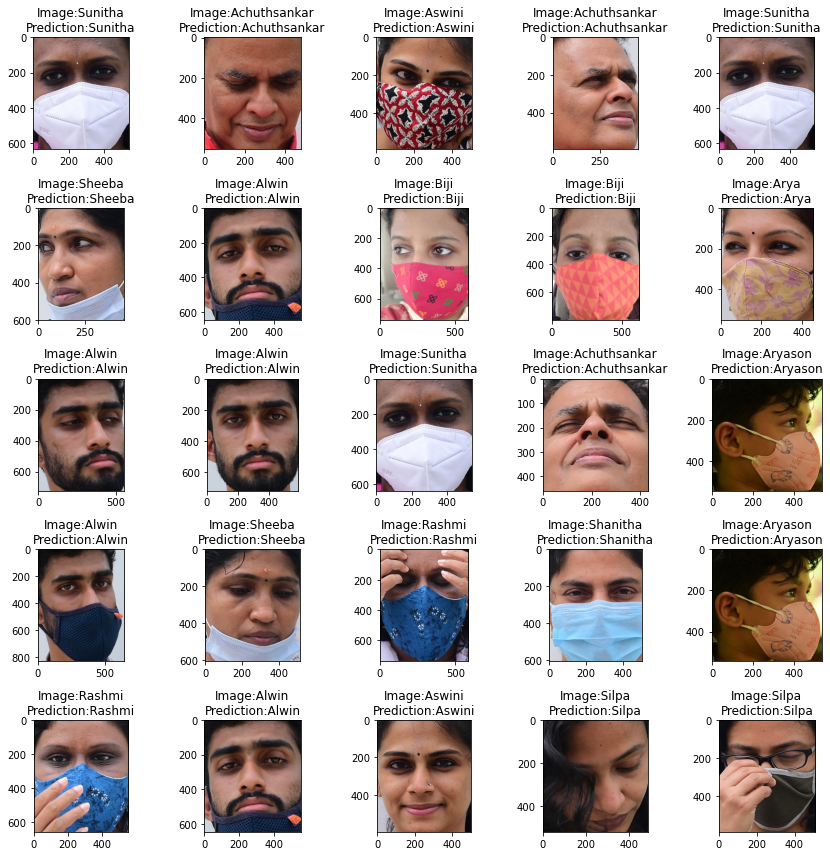

In [64]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  filename = random.choice(filenames)
  filename_split = filename.split('.')[0]
  result = model.predict_classes([prepare(path + filename)])
  testimage = image.load_img(path + filename)
  plt.imshow(testimage)
  plt.title("Image:" + filename_split + "\nPrediction:" + Classes[int(result[0])])

plt.tight_layout()
plt.show()

In [52]:
from itertools import cycle

from sklearn.metrics import roc_curve, auc

from sklearn.multiclass import OneVsRestClassifier

from scipy import interp
from sklearn.metrics import roc_auc_score

In [53]:
# Compute ROC curve and ROC area for each class
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_classes = 13

for i in range(n_classes):    
    fpr[i], tpr[i], thresh[i] = roc_curve(true_classes, predictions[:,i], pos_label=i)

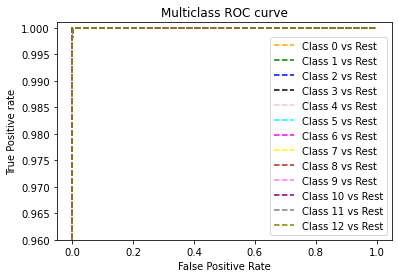

In [54]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 3 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='pink', label='Class 4 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='cyan', label='Class 5 vs Rest')
plt.plot(fpr[0], tpr[0], linestyle='--',color='magenta', label='Class 6 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='yellow', label='Class 7 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='brown', label='Class 8 vs Rest')
plt.plot(fpr[0], tpr[0], linestyle='--',color='violet', label='Class 9 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='purple', label='Class 10 vs Rest')
plt.plot(fpr[0], tpr[0], linestyle='--',color='gray', label='Class 11 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='olive', label='Class 12 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.ylim([0.96, 1.001])
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

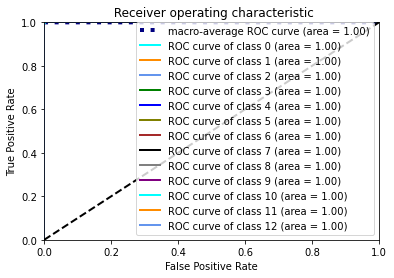

In [55]:
roc_auc = dict()
for i in range(n_classes):
    roc_auc[i] = auc(fpr[i], tpr[i])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
lw=2
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'blue', 'olive', 'brown', 'black', 'gray', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()